Consideramos como extras a: gimnasio, SUM y piscina (considerar unir con cercanias)

In [2]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from pywaffle import Waffle


In [3]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [4]:
# nos quedamos con las columnas que nos interesan
df = df[['tipodepropiedad', 'gimnasio', 'usosmultiples', 'piscina', 'precio', 'fecha']]
df.head(2)

,tipodepropiedad,gimnasio,usosmultiples,piscina,precio,fecha
id,,,,,,
254099,Apartamento,0.0,0.0,0.0,2273000.0,2015-08-23
53461,Casa en condominio,0.0,0.0,0.0,3600000.0,2013-06-28


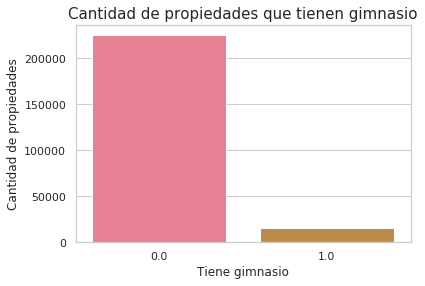

In [5]:
gyms = df[df['gimnasio'].notnull()].groupby('gimnasio').agg({'tipodepropiedad':'count'}).sort_values(by='tipodepropiedad', ascending = False)
gyms.reset_index(inplace=True)
g = sns.barplot(x=gyms.gimnasio, y=gyms.tipodepropiedad,palette=sns.color_palette("husl", 8))
g.set_title("Cantidad de propiedades que tienen gimnasio", fontsize=15)
g.set_xlabel("Tiene gimnasio", fontsize=12)
g.set_ylabel("Cantidad de propiedades", fontsize=12);

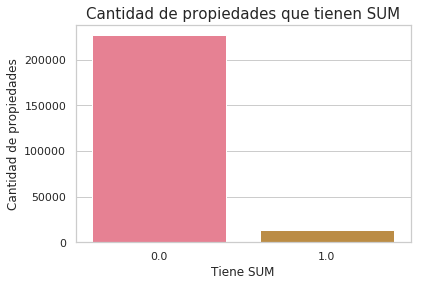

In [6]:
sums = df[df['usosmultiples'].notnull()].groupby('usosmultiples').agg({'tipodepropiedad':'count'}).sort_values(by='tipodepropiedad', ascending = False)
sums.reset_index(inplace=True)
g = sns.barplot(x=sums.usosmultiples, y=sums.tipodepropiedad,palette=sns.color_palette("husl", 8))
g.set_title("Cantidad de propiedades que tienen SUM", fontsize=15)
g.set_xlabel("Tiene SUM", fontsize=12)
g.set_ylabel("Cantidad de propiedades", fontsize=12);

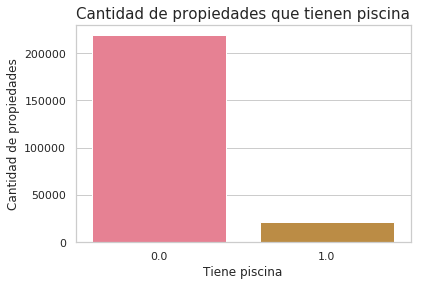

In [7]:
pools = df[df['piscina'].notnull()].groupby('piscina').agg({'tipodepropiedad':'count'}).sort_values(by='tipodepropiedad', ascending = False)
pools.reset_index(inplace=True)
g = sns.barplot(x=pools.piscina, y=pools.tipodepropiedad,palette=sns.color_palette("husl", 8))
g.set_title("Cantidad de propiedades que tienen piscina", fontsize=15)
g.set_xlabel("Tiene piscina", fontsize=12)
g.set_ylabel("Cantidad de propiedades", fontsize=12);

In [8]:
# cantidad de extras por persona (entre 0 y 3)
df['qty_of_extras'] = df['gimnasio'] + df['usosmultiples'] + df['piscina']
calculated = df.qty_of_extras.value_counts()
calculated = calculated/1000

/home/cami/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


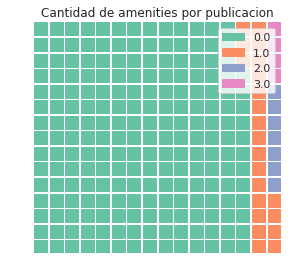

In [9]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    values=list(calculated.values),
    labels=list(calculated.index), title={'label':'Cantidad de amenities por publicacion'}
)


In [10]:
price_by_qty_extras = df[['qty_of_extras','precio']]

Text(0,0.5,'Precio')

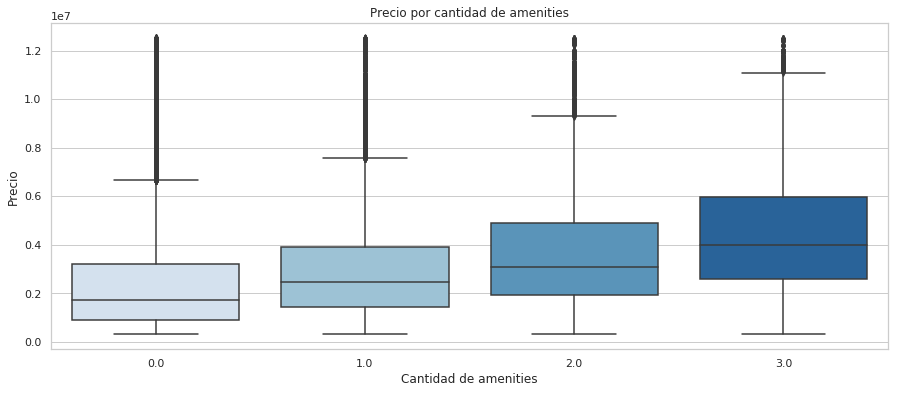

In [11]:

plt.figure(figsize=(15, 6))
plt.title('Precio por cantidad de amenities')
g = sns.boxplot(x='qty_of_extras', y='precio', data=price_by_qty_extras, palette='Blues')
g.set_xlabel('Cantidad de amenities')
g.set_ylabel('Precio')



In [12]:
##veo los tipos de propiedades con más publicaciones
df.tipodepropiedad.value_counts().head(4)

Casa                  141717
Apartamento            57341
Casa en condominio     19297
Terreno                 9945
Name: tipodepropiedad, dtype: int64

In [13]:
## comparo amenities en casa vs en apartamento

In [14]:
casas_y_apartamentos = df[(df['tipodepropiedad'] == 'Casa') | (df['tipodepropiedad'] == 'Apartamento')]
casas_y_apartamentos.head()

,tipodepropiedad,gimnasio,usosmultiples,piscina,precio,fecha,qty_of_extras
id,,,,,,,
254099,Apartamento,0.0,0.0,0.0,2273000.0,2015-08-23,0.0
247984,Casa,0.0,0.0,0.0,1200000.0,2015-10-17,0.0
209067,Casa,0.0,0.0,0.0,650000.0,2012-03-09,0.0
185997,Apartamento,0.0,0.0,0.0,1150000.0,2016-06-07,0.0
126147,Apartamento,0.0,0.0,0.0,1100000.0,2014-03-18,0.0


In [43]:
gyms_by_tipo = casas_y_apartamentos.groupby('tipodepropiedad').agg({'gimnasio':('sum', lambda x: x.eq(0).sum())})
gyms_by_tipo.columns = ['tiene gimnasio', 'no tiene gimnasio']
gyms_by_tipo

,tiene gimnasio,no tiene gimnasio
tipodepropiedad,,
Apartamento,7591.0,49750.0
Casa,6105.0,135612.0


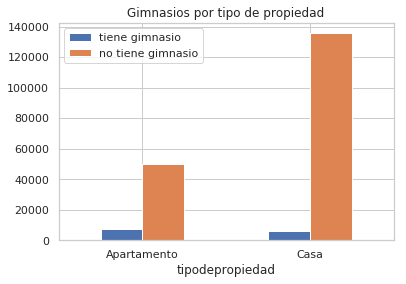

In [45]:
plt = gyms_by_tipo.plot(kind='bar', title='Gimnasios por tipo de propiedad', rot=0)

In [48]:
sum_by_tipo = casas_y_apartamentos.groupby('tipodepropiedad').agg({'usosmultiples':('sum', lambda x: x.eq(0).sum())})
sum_by_tipo.columns = ['tiene SUM', 'no tiene SUM']
sum_by_tipo

,tiene SUM,no tiene SUM
tipodepropiedad,,
Apartamento,6187.0,51154.0
Casa,5099.0,136618.0


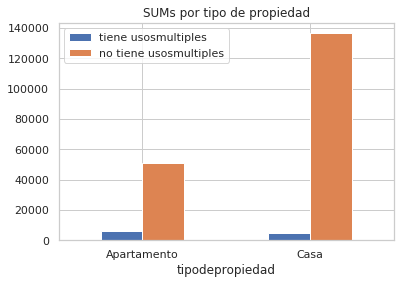

In [47]:
plt = sum_by_tipo.plot(kind='bar', title='SUMs por tipo de propiedad', rot=0)

In [49]:
pileta_by_tipo = casas_y_apartamentos.groupby('tipodepropiedad').agg({'piscina':('sum', lambda x: x.eq(0).sum())})
pileta_by_tipo.columns = ['tiene piscina', 'no tiene piscina']
pileta_by_tipo

,tiene piscina,no tiene piscina
tipodepropiedad,,
Apartamento,8095.0,49246.0
Casa,9109.0,132608.0


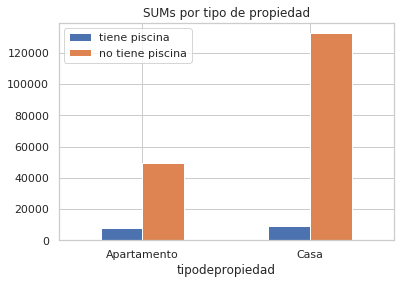

In [50]:
plt = pileta_by_tipo.plot(kind='bar', title='SUMs por tipo de propiedad', rot=0)